# VISU - H1N1 VACCINES - Bar Plot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vacc_features = pd.read_csv("H1N1 Vaccines/training_set_features.csv")
vacc_labels = pd.read_csv("H1N1 Vaccines/training_set_labels.csv")

In [5]:
vacc_features = vacc_features.loc[:,["respondent_id","age_group"]]
vacc_features

,respondent_id,age_group
0,0,55 - 64 Years
1,1,35 - 44 Years
2,2,18 - 34 Years
3,3,65+ Years
4,4,45 - 54 Years
...,...,...
26702,26702,65+ Years
26703,26703,18 - 34 Years
26704,26704,55 - 64 Years
26705,26705,18 - 34 Years


In [9]:
merge = vacc_labels.merge(vacc_features,on="respondent_id",how='inner')
merge = merge.loc[merge.h1n1_vaccine >= 1]
gb = merge.groupby("age_group").agg({"h1n1_vaccine":"sum"}).reset_index()
gb

,age_group,h1n1_vaccine
0,18 - 34 Years,991
1,35 - 44 Years,761
2,45 - 54 Years,1020
3,55 - 64 Years,1351
4,65+ Years,1551


[Text(0, 0, '18 - 34'),
 Text(1, 0, '35 - 44'),
 Text(2, 0, '45 - 54'),
 Text(3, 0, '55 - 64'),
 Text(4, 0, '65+')]

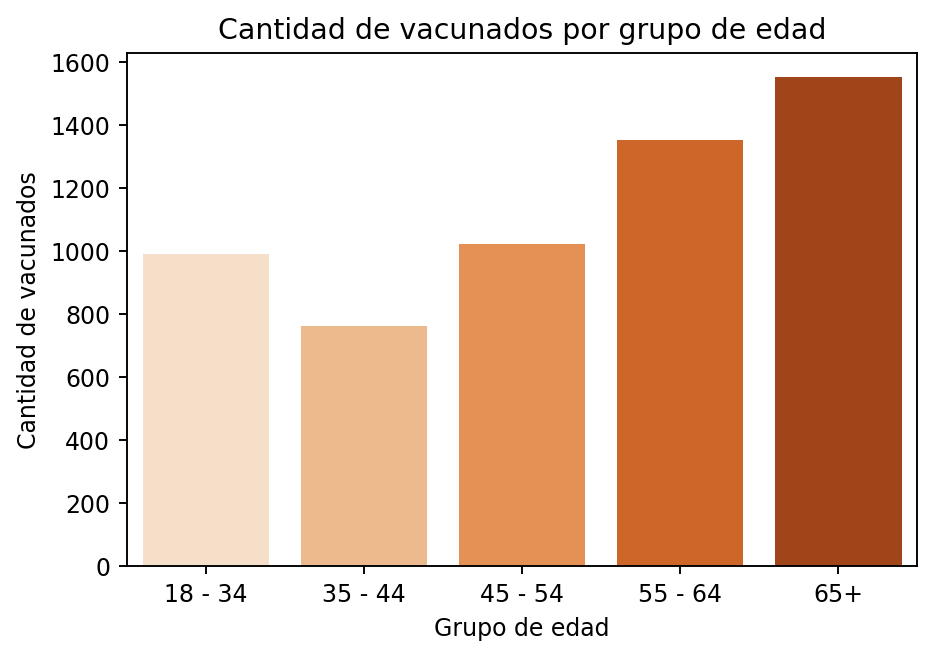

In [15]:
fig, ax = plt.subplots(dpi=170)
ax.set_title('Cantidad de vacunados por grupo de edad',fontsize=12)
sns.barplot(x=gb.age_group, y=gb.h1n1_vaccine,palette="Oranges")
ax.set_ylabel('Cantidad de vacunados',fontsize=10)
ax.set_xlabel('Grupo de edad',fontsize=10)
x_labels = ["18 - 34", "35 - 44", "45 - 54", "55 - 64","65+"]
ax.set_xticklabels(x_labels,fontsize=10)